<a href="https://colab.research.google.com/github/kaicque/Bootcamp_DataScience/blob/main/Desafio_aula_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Lista de desafios as serem cumpridos nesta análise
Desafio 01: Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

Desafio 02: Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

Desafio 03: Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

Desafio 04: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

Desafio 05: Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.

#Importação e tratamento dos dados

##Importação de bibliotecas e dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import Image
!git clone https://github.com/kaicque/Bootcamp_DataScience.git
import seaborn as sns

Cloning into 'Bootcamp_DataScience'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 48 (delta 14), reused 17 (delta 5), pack-reused 0
Unpacking objects: 100% (48/48), done.


In [2]:
dados = pd.read_csv("/content/Bootcamp_DataScience/Bases/Base por data de internação.csv", encoding="iso-8859-1",
                    skiprows = 3, sep=";", skipfooter = 12,
                    thousands=".", decimal=",")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


##Criação de lista de colunas usáveis (aquelas que todas as regiões tem valor preenchidos)

In [3]:
colunas_usaveis = dados.mean().index.tolist()
colunas_usaveis.insert(0,"Unidade da Federação")

##Criação de um novo dataframe somente com os meses usáveis

In [4]:
usaveis = dados[colunas_usaveis]
usaveis = usaveis.set_index("Unidade da Federação")
usaveis = usaveis.drop("Total", axis=1) ## exclusão da coluna totalizadora original do dataframe pois fizemos tratamento de colunas, por isso precisamos refazer esse dado

##Criação novo dataframe com o totalizador considerando somente as colunas usaveis e ordenando pelo total

In [5]:
#Ordenando os dados pela colunas totais
usaveis["Total"] = usaveis.sum(axis=1)
usaveisordenadas = usaveis.sort_values(by='Total', ascending=False)
usaveisordenadas = usaveisordenadas.drop('Total', axis=1)
usaveisordenadas = usaveisordenadas.iloc[:,6:] #pulando as primeiras colunas onde tem dados fragmentados

,2008/Fev,2008/Mar,2008/Abr,2008/Mai,2008/Jun,2008/Jul,2008/Ago,2008/Set,2008/Out,2008/Nov,2008/Dez,2009/Jan,2009/Fev,2009/Mar,2009/Abr,2009/Mai,2009/Jun,2009/Jul,2009/Ago,2009/Set,2009/Out,2009/Nov,2009/Dez,2010/Jan,2010/Fev,2010/Mar,2010/Abr,2010/Mai,2010/Jun,2010/Jul,2010/Ago,2010/Set,2010/Out,2010/Nov,2010/Dez,2011/Jan,2011/Fev,2011/Mar,2011/Abr,2011/Mai,...,2017/Dez,2018/Jan,2018/Fev,2018/Mar,2018/Abr,2018/Mai,2018/Jun,2018/Jul,2018/Ago,2018/Set,2018/Out,2018/Nov,2018/Dez,2019/Jan,2019/Fev,2019/Mar,2019/Abr,2019/Mai,2019/Jun,2019/Jul,2019/Ago,2019/Set,2019/Out,2019/Nov,2019/Dez,2020/Jan,2020/Fev,2020/Mar,2020/Abr,2020/Mai,2020/Jun,2020/Jul,2020/Ago,2020/Set,2020/Out,2020/Nov,2020/Dez,2021/Jan,2021/Fev,2021/Mar
Unidade da Federação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
35 São Paulo,1.729620e+08,1.705567e+08,1.703382e+08,1.724621e+08,1.754930e+08,1.795699e+08,1.800051e+08,1.801517e+08,1.918599e+08,1.909273e+08,1.770939e+08,1.924121e+08,1.786413e+08,2.170117e+08,2.151281e+08,2.129052e+08,2.127155e+08,2.140794e+08,2.152656e+08,2.142499e+08,2.161171e+08,2.091840e+08,1.921570e+08,2.135128e+08,1.957879e+08,2.394114e+08,2.212029e+08,2.319228e+08,2.240438e+08,2.241577e+08,2.487619e+08,2.241210e+08,2.393542e+08,2.256391e+08,2.107109e+08,2.291469e+08,2.216600e+08,2.414456e+08,2.299206e+08,2.508174e+08,...,2.596379e+08,2.796517e+08,2.542191e+08,2.853474e+08,2.863719e+08,2.916791e+08,2.791022e+08,2.861512e+08,2.956691e+08,2.776856e+08,3.027666e+08,2.782684e+08,2.667703e+08,2.918937e+08,2.680835e+08,2.871550e+08,2.928705e+08,3.091409e+08,2.816218e+08,3.071951e+08,3.035841e+08,2.940841e+08,3.038664e+08,2.827918e+08,2.733575e+08,3.038659e+08,2.720507e+08,2.779387e+08,2.551787e+08,3.142763e+08,3.282936e+08,3.619869e+08,3.502687e+08,3.388725e+08,3.280558e+08,3.245998e+08,3.268462e+08,3.241154e+08,2.681931e+08,1.774083e+08
31 Minas Gerais,7.030109e+07,7.911901e+07,7.904632e+07,7.926807e+07,7.961919e+07,8.220921e+07,8.037412e+07,8.240913e+07,8.861348e+07,8.448700e+07,8.892863e+07,9.901816e+07,8.367512e+07,1.002586e+08,9.183133e+07,9.728970e+07,9.572340e+07,1.000500e+08,9.897718e+07,9.820212e+07,9.696239e+07,9.476764e+07,9.241277e+07,9.580656e+07,9.076489e+07,1.073899e+08,1.008360e+08,1.054946e+08,9.966612e+07,1.033654e+08,1.078443e+08,1.043411e+08,1.005254e+08,1.019436e+08,9.953895e+07,1.077661e+08,1.031494e+08,1.110771e+08,1.060943e+08,1.154872e+08,...,1.383666e+08,1.465106e+08,1.307340e+08,1.515068e+08,1.507026e+08,1.536049e+08,1.502625e+08,1.567219e+08,1.604849e+08,1.459986e+08,1.572946e+08,1.481728e+08,1.454224e+08,1.532364e+08,1.426908e+08,1.519762e+08,1.579579e+08,1.636411e+08,1.541742e+08,1.667759e+08,1.617747e+08,1.574378e+08,1.661651e+08,1.521715e+08,1.524733e+08,1.582658e+08,1.414634e+08,1.476549e+08,1.274473e+08,1.427463e+08,1.572766e+08,1.774666e+08,1.821761e+08,1.814225e+08,1.745856e+08,1.685647e+08,1.663770e+08,1.550645e+08,1.198774e+08,7.978084e+07
41 Paraná,4.885505e+07,5.561179e+07,5.611514e+07,5.557483e+07,5.609475e+07,5.980240e+07,5.669900e+07,5.809199e+07,6.136594e+07,5.966721e+07,5.781620e+07,6.038159e+07,5.723910e+07,6.907049e+07,6.405468e+07,6.868554e+07,6.793123e+07,7.095876e+07,6.922578e+07,6.784997e+07,6.855821e+07,6.715850e+07,6.309427e+07,6.690264e+07,6.450113e+07,7.713887e+07,7.075540e+07,7.345676e+07,7.183902e+07,7.301383e+07,7.615101e+07,7.424096e+07,7.304239e+07,7.636475e+07,7.051764e+07,7.471278e+07,7.131474e+07,7.691467e+07,7.423294e+07,8.170902e+07,...,1.055581e+08,1.161332e+08,1.070760e+08,1.223314e+08,1.247313e+08,1.270831e+08,1.226169e+08,1.279919e+08,1.312572e+08,1.206474e+08,1.295302e+08,1.218107e+08,1.129846e+08,1.241592e+08,1.177155e+08,1.239074e+08,1.274645e+08,1.326080e+08,1.248659e+08,1.347087e+08,1.271744e+08,1.262040e+08,1.338706e+08,1.262211e+08,1.135738e+08,1.223301e+08,1.161257e+08,1.147766e+08,9.778406e+07,1.110128e+08,1.152037e+08,1.238566e+08,1.250895e+08,1.217712e+08,1.275061e+08,1.334433e+08,1.221463e+08,1.069489e+08,8.313018e+07,4.348073e+07
43

#Criação das analises

##Desafio 1 - Buscar na documentação do Matplotlib como colocar um grid nos gráficos e adicionar nos gráficos de barra.

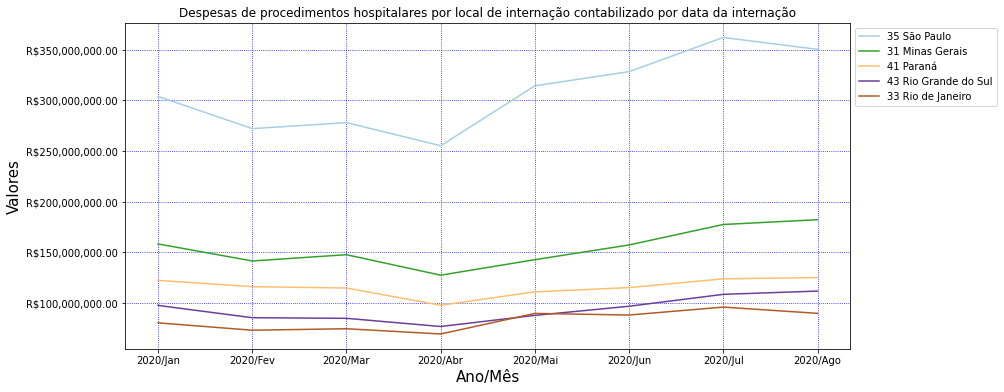

In [15]:
ax = usaveisordenadas.iloc[:5,:].loc[:,'2020/Jan':'2020/Ago'].T.plot(figsize=(13,6), cmap=plt.get_cmap('Paired')) 
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
#criando uma palheta de 27 cores
sns.set_palette(sns.color_palette("gist_rainbow", 27))
#Criando grid para o gráfico requisito do desafio 1
#ax.grid(color='black', linestyle='--', linewidth=1) opção 1 de grid
ax.grid(axis='both',linestyle='dotted', color='b') #opção 2 de grid, mais bonita
#Adicionando Titulo ao gráfico
plt.title("Despesas de procedimentos hospitalares por local de internação contabilizado por data da internação")
#Posicionando legenda
plt.legend(loc=0, bbox_to_anchor=(1, 1))
#Adicionando legenda dos eixos
plt.xlabel('Ano/Mês', fontsize=15)
plt.ylabel('Valores', fontsize=15)
plt.show()

## Desafio 2 - Fazer um gráfico e uma tabela do gasto dos outros estados em função do seu estado, ou qualquer outro de interesse.

In [23]:
#criação de tabela dos gastos de 2019
gasto2019 = usaveisordenadas.loc[:,'2019/Jan':'2019/Dez']
gasto2019["Total"] = gasto2019.sum(axis=1)
gasto2019 = gasto2019.sort_values(by='Total', ascending=False)
gasto2019 = gasto2019.loc[:,'Total']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [26]:
gastos2019comparativos = gasto2019/gasto2019["35 São Paulo"]

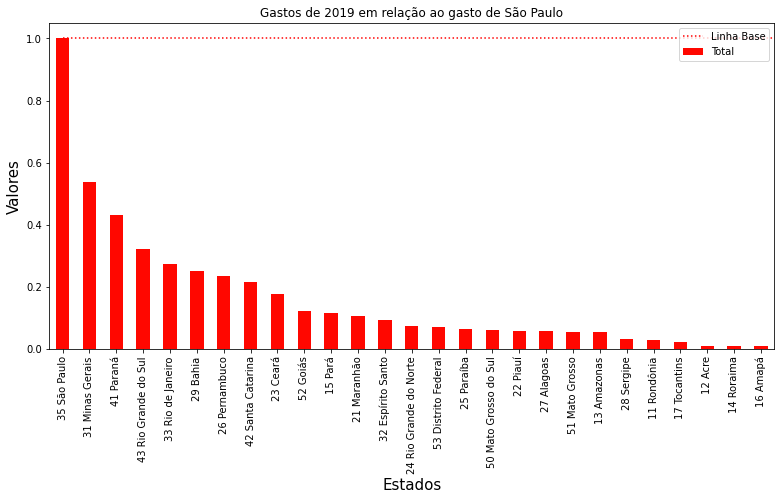

In [55]:
gastos2019comparativos.plot(kind="bar",figsize=(13,6))
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("R${x:,.2f}"))
#ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("<%d>"))
#ax.yaxis.set_major_formatter(ticker.PercentFormatter(1.0))
#ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 
#ax.yaxis.set_major_formatter(FuncFormatter('{0:.0%}'.format))
#ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos: "[%.2f]" % x)

#criando uma palheta de 27 cores
sns.set_palette(sns.color_palette("gist_rainbow", 27))
#Criando grid para o gráfico requisito do desafio 1
#ax.grid(color='black', linestyle='--', linewidth=1) opção 1 de grid
ax.grid(axis='both',linestyle='dotted', color='b') #opção 2 de grid, mais bonita
#Criação da linha base do estado utilizado como base para os outros estados
plt.hlines(y=1, xmin=0, xmax=27,
           colors="red", label= "Linha Base", linestyles='dotted')
#Adicionando Titulo ao gráfico
plt.title("Gastos de 2019 em relação ao gasto de São Paulo")
#Posicionando legenda
plt.legend(loc=0, bbox_to_anchor=(1, 1))
#Adicionando legenda dos eixos
plt.xlabel('Estados', fontsize=15)
plt.ylabel('Valores', fontsize=15)
plt.show()

In [ ]:
#Dividindo os valores por 1,000,000 para ter o gasto  em milhões
#usaveisordenadas = (usaveisordenadas / 1000000)

In [ ]:
#Criando o parametro de meses filtrados para replicar o gráfico acima de outro modo
#mesesfiltrados = usaveisordenadas.columns[54:150]
#mesesfiltrados

##Desafio 03 - Fazer o cálculo proporcional a população do seu estado e mais um a sua escolha.

In [65]:
#Inclusão da base de dados de quantidade de habitantes de cada estado
populacao = pd.read_csv("/content/Bootcamp_DataScience/Bases/População estimada de 2019.csv", encoding="iso-8859-1",
                    skiprows = 3, sep=";", skipfooter = 12,
                    thousands=".", decimal=",")
populacao = populacao.set_index("Unidade da Federação")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


In [88]:
# Criação dos valores gastos por habitante
gastoppopulacaosp = gasto2019['35 São Paulo']/populacao.loc['35 São Paulo']
gastoppopulacaorj = gasto2019['33 Rio de Janeiro']/populacao.loc['33 Rio de Janeiro']
#gastoppopulacaopr = gasto2019['41 Paraná']/populacao.loc['41 Paraná']
#gastoppopulacaopa = gasto2019['15 Pará']/populacao.loc['15 Pará']
#gastoppopulacaope = gasto2019['26 Pernambuco']/populacao.loc['26 Pernambuco']

In [94]:
#dados_interesse = pd.DataFrame( data = [gastoppopulacaosp, gastoppopulacaorj,gastoppopulacaopr,gastoppopulacaopa,gastoppopulacaope], index = ['35 São Paulo','33 Rio de Janeiro','41 Paraná','15 Pará','26 Pernambuco'])
dados_interesse = pd.DataFrame( data = [gastoppopulacaosp, gastoppopulacaorj], index = ['35 São Paulo','33 Rio de Janeiro'])

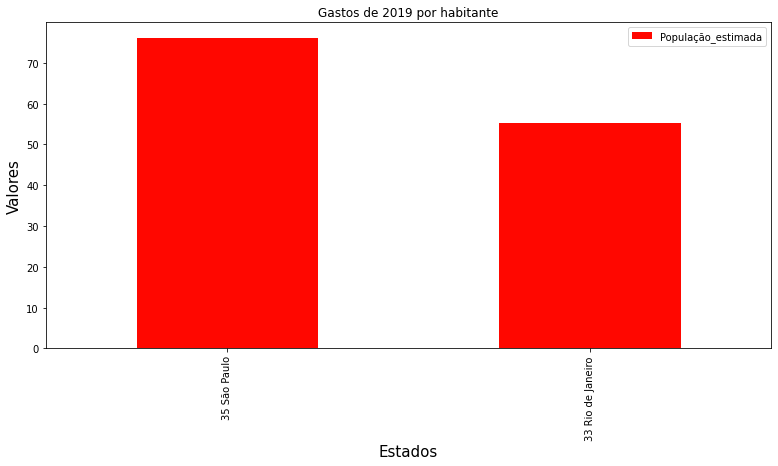

In [93]:
dados_interesse.plot(kind="bar",figsize=(13,6))
#criando uma palheta de 27 cores
sns.set_palette(sns.color_palette("gist_rainbow", 27))
#Criando grid para o gráfico requisito do desafio 1
#ax.grid(color='black', linestyle='--', linewidth=1) opção 1 de grid
ax.grid(axis='both',linestyle='dotted', color='b') #opção 2 de grid, mais bonita
#Adicionando Titulo ao gráfico
plt.title("Gastos de 2019 por habitante")
#Posicionando legenda
plt.legend(loc=0, bbox_to_anchor=(1, 1))
#Adicionando legenda dos eixos
plt.xlabel('Estados', fontsize=15)
plt.ylabel('Valores', fontsize=15)
plt.show()

##Desafio 4 e 5: 
-Desafio 04: Faça uma análise dos dados analisados, levante hipóteses e compartilhe com a gente no Discord.

-Desafio 05: Reproduza as análises feitas em aulas, refletindo e levantando hipóteses.

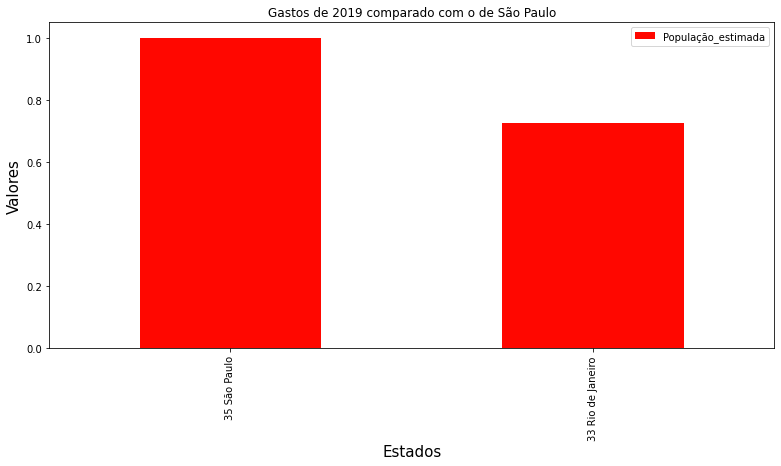

In [99]:
dadoscomparados.plot(kind="bar",figsize=(13,6))
#criando uma palheta de 27 cores
sns.set_palette(sns.color_palette("gist_rainbow", 27))
#Criando grid para o gráfico requisito do desafio 1
#ax.grid(color='black', linestyle='--', linewidth=1) opção 1 de grid
ax.grid(axis='both',linestyle='dotted', color='b') #opção 2 de grid, mais bonita
#Adicionando Titulo ao gráfico
plt.title("Gastos de 2019 comparado com o de São Paulo")
#Posicionando legenda
plt.legend(loc=0, bbox_to_anchor=(1, 1))
#Adicionando legenda dos eixos
plt.xlabel('Estados', fontsize=15)
plt.ylabel('Valores', fontsize=15)
plt.show()

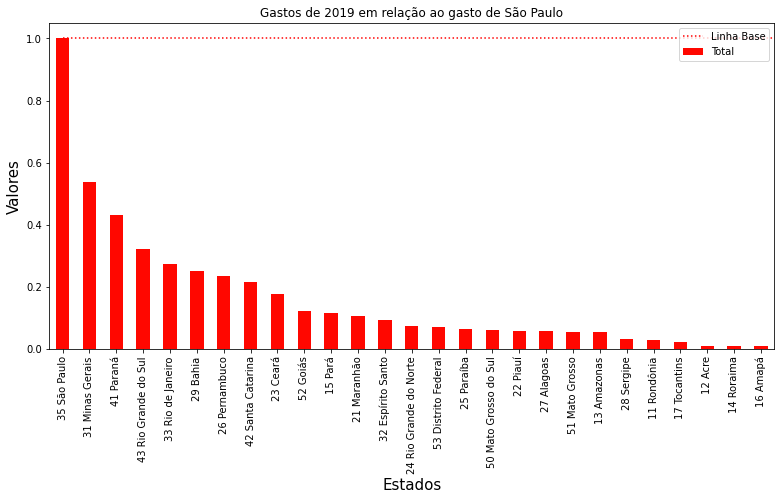

In [126]:
gastos2019comparativos.plot(kind="bar",figsize=(13,6))
#criando uma palheta de 27 cores
sns.set_palette(sns.color_palette("gist_rainbow", 27))
#Criação da linha base do estado utilizado como base para os outros estados
plt.hlines(y=1, xmin=0, xmax=27,
           colors="red", label= "Linha Base", linestyles='dotted')
#Adicionando Titulo ao gráfico
plt.title("Gastos de 2019 em relação ao gasto de São Paulo")
#Posicionando legenda
plt.legend(loc=0, bbox_to_anchor=(1, 1))
#Adicionando legenda dos eixos
plt.xlabel('Estados', fontsize=15)
plt.ylabel('Valores', fontsize=15)
plt.show()

Comparando o gasto por habitante entre o SP e RJ onde, RJ fica com quase 80% do gasto de SP, mas em valores absolutos fica com menos de 40%. Isso mostra que o gasto de são paulo está maior por conta da quantidade de habitante. 
Claro que os valores por habitantes ainda tem uma diferencia, o que pode indicar que os gastos tem outra váriável influênciadora que não está no modelo. 
Mas de imediato explicamos a variação de gastos absolutos entre os estados.